###### Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("cpa.csv")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# Categorical Variables
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of categorical variables: ', len(categorical_features))

Number of categorical variables:  3


In [6]:
# Checking unique values from Categorical Columns

for feature in categorical_features:
    #print(feature,'\n')
    print(df[feature].value_counts())
    print('-----------------------------------------------')

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
-----------------------------------------------
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
-----------------------------------------------
31-08-2012    12
12-05-2014    11
14-02-2013    11
12-09-2012    11
20-08-2013    10
              ..
14-09-2013     1
21-10-2012     1
11-10-2012     1
27-11-2012     1
04-08-2013     1
Name: Dt_Customer, Length: 663, dtype: int64
-----------------------------------------------


In [7]:
#Forming New Catagories
Edu={'Basic':'Secondary',
                  '2n Cycle':'Graduation',
                     'Master':'Higher education',
                     'PhD':'Higher education',
                     'Graduation':'Graduation'}
Marital={'Single':'Single',
                     'Alone':'Single',
                     'Widow':'Single',
                     'Divorced':'Single',
                     'Together':'Married',
                     'Married':'Married',
                     'Absurd':'New',
                      'YOLO':'New'}
df['Education']= df['Education'].map(Edu)
df['Marital_Status'] = df['Marital_Status'].map(Marital)

In [8]:
# Checking unique values from Categorical Columns

for feature in categorical_features:
    #print(feature,'\n')
    print(df[feature].value_counts())
    print('-----------------------------------------------')

Graduation          1330
Higher education     856
Secondary             54
Name: Education, dtype: int64
-----------------------------------------------
Married    1444
Single      792
New           4
Name: Marital_Status, dtype: int64
-----------------------------------------------
31-08-2012    12
12-05-2014    11
14-02-2013    11
12-09-2012    11
20-08-2013    10
              ..
14-09-2013     1
21-10-2012     1
11-10-2012     1
27-11-2012     1
04-08-2013     1
Name: Dt_Customer, Length: 663, dtype: int64
-----------------------------------------------


In [9]:
tot_children=df['Kidhome']+df['Teenhome']
df['tot_children']=tot_children
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,tot_children
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,1
4,5324,1981,Higher education,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,1
2236,4001,1946,Higher education,Married,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,3
2237,7270,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,0
2238,8235,1956,Higher education,Married,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,1


In [10]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
tot_children            0
dtype: int64

In [11]:
df['Income'] = df['Income'].replace(' ', np.nan)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,tot_children
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,1
4,5324,1981,Higher education,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,1
2236,4001,1946,Higher education,Married,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,3
2237,7270,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,0
2238,8235,1956,Higher education,Married,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,1


In [12]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,tot_children
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,0.950446
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.751803
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,3.000000


In [13]:
data=df.copy()
data=data.drop(['Kidhome','Teenhome'],axis=1)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,tot_children
0,5524,1957,Graduation,Single,58138.0,04-09-2012,58,635,88,546,...,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.0,08-03-2014,38,11,1,6,...,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Married,71613.0,21-08-2013,26,426,49,127,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Married,26646.0,10-02-2014,26,11,4,20,...,0,0,0,0,0,0,3,11,0,1
4,5324,1981,Higher education,Married,58293.0,19-01-2014,94,173,43,118,...,0,0,0,0,0,0,3,11,0,1


In [14]:
"""total_purchase=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']
data['tot_purchase']=total_purchase
total_sources=data['NumDealsPurchases']+data['NumWebPurchases']+data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']+data['NumWebVisitsMonth']
data['tot_sources']=total_sources
total_offer_acce=data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']
data['total_offer_acce']=total_offer_acce
data"""

"total_purchase=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']\ndata['tot_purchase']=total_purchase\ntotal_sources=data['NumDealsPurchases']+data['NumWebPurchases']+data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']+data['NumWebVisitsMonth']\ndata['tot_sources']=total_sources\ntotal_offer_acce=data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']\ndata['total_offer_acce']=total_offer_acce\ndata"

In [15]:
# MAx year from Dt_Customer is 2014 so we use this for calculating age of customer at the time of customer enrollment
data['Dt_Customer'] = data['Dt_Customer'].astype('datetime64')
#data['Date_Customer'] = data['Dt_Customer'].dt.day.astype('int64')
#data['Month_Customer'] = data['Dt_Customer'].dt.month.astype('int64')
data['Year_Customer'] = data['Dt_Customer'].dt.year.astype('int64')
age=data['Year_Customer'] - data['Year_Birth']
data['age']=age
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,tot_children,Year_Customer,age
0,5524,1957,Graduation,Single,58138.0,2012-04-09,58,635,88,546,...,0,0,0,0,3,11,1,0,2012,55
1,2174,1954,Graduation,Single,46344.0,2014-08-03,38,11,1,6,...,0,0,0,0,3,11,0,2,2014,60
2,4141,1965,Graduation,Married,71613.0,2013-08-21,26,426,49,127,...,0,0,0,0,3,11,0,0,2013,48
3,6182,1984,Graduation,Married,26646.0,2014-10-02,26,11,4,20,...,0,0,0,0,3,11,0,1,2014,30
4,5324,1981,Higher education,Married,58293.0,2014-01-19,94,173,43,118,...,0,0,0,0,3,11,0,1,2014,33


In [16]:
data=data.drop(['Z_CostContact','Z_Revenue','Dt_Customer','Year_Birth'],axis=1)
data.head()

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,tot_children,Year_Customer,age
0,5524,Graduation,Single,58138.0,58,635,88,546,172,88,...,0,0,0,0,0,0,1,0,2012,55
1,2174,Graduation,Single,46344.0,38,11,1,6,2,1,...,0,0,0,0,0,0,0,2,2014,60
2,4141,Graduation,Married,71613.0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,0,2013,48
3,6182,Graduation,Married,26646.0,26,11,4,20,10,3,...,0,0,0,0,0,0,0,1,2014,30
4,5324,Higher education,Married,58293.0,94,173,43,118,46,27,...,0,0,0,0,0,0,0,1,2014,33


In [17]:
#Fill NAn values in salary
data['Income'] = data['Income'].fillna(data['Income'].median())
data.head()

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,tot_children,Year_Customer,age
0,5524,Graduation,Single,58138.0,58,635,88,546,172,88,...,0,0,0,0,0,0,1,0,2012,55
1,2174,Graduation,Single,46344.0,38,11,1,6,2,1,...,0,0,0,0,0,0,0,2,2014,60
2,4141,Graduation,Married,71613.0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,0,2013,48
3,6182,Graduation,Married,26646.0,26,11,4,20,10,3,...,0,0,0,0,0,0,0,1,2014,30
4,5324,Higher education,Married,58293.0,94,173,43,118,46,27,...,0,0,0,0,0,0,0,1,2014,33


In [18]:
data.isnull().sum()

ID                     0
Education              0
Marital_Status         0
Income                 0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
tot_children           0
Year_Customer          0
age                    0
dtype: int64

In [ ]:
#encoding the levels of categorical features Class into numeric values.or can do onehot coading
from sklearn.preprocessing import LabelEncoder
#dsdgd
lblEn = LabelEncoder()

data['Education'] =lblEn.fit_transform(data['Education'])

In [ ]:
#encoding the levels of categorical features Class into numeric values.or can do onehot coading
from sklearn.preprocessing import LabelEncoder
#dsdgd
lblEn = LabelEncoder()

data['Marital_Status'] =lblEn.fit_transform(data['Marital_Status'])

<AxesSubplot:xlabel='ID'>

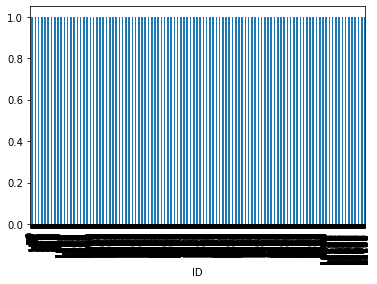

In [25]:
data.groupby('ID')['MntSweetProducts'].count().plot(kind='bar')

In [ ]:
plt.figure(figsize=(20,20), facecolor='white')
sns.pairplot(data)

C:\Users\Personal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

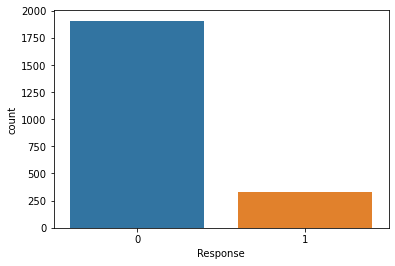

In [27]:
#now let's check distribution of Class attribute
sns.countplot(data['Response'])

###### which shows imbalanced data at Class attbute so we need to balanced this data using imbalanced-learn

In [ ]:
#Random Over Sampling fo balancing Response data
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

# Separate input features and target
y = data.Response
X = data.drop('Response', axis=1)

# setting up testing and training sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

rov = RandomOverSampler()
X, y= rov.fit_resample(X,y)

In [ ]:
X.shape

In [ ]:
sns.countplot(y)    

###### From above Resampling imbalancingTechnique we get balanced data for Resource Column.

In [ ]:

# let's see how data is distributed for continues columns
columns = ['age','Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts']
plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in columns:
    if plotnumber<=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()